## Kalman Filtering


In [1]:
import Simulator
import Observation
import Statistics
import LETKalmanFilter

### Definition of forward model

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators



In [2]:
timestamp = "2021_07_29-12_52_15"

grid, simulator = Simulator.from_file(timestamp)

### Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
import numpy as np

def prior(grid, phi):
    """
    Constructing a Matern-type covariance prior with Matern-parameter phi
    where the matrix is normalized with the standard deviation
    """
    # INPUT! Bell mean
    mean = 0.0*np.ones(grid.N_x)
    # INPUT! Constant var
    var  = 0.5*np.ones(grid.N_x)

    # Matern covariance
    dist_mat = np.copy(grid.dist_mat)
    cov = (1+phi*dist_mat)*np.exp(-phi*dist_mat)
    
    # Normalisation
    var_mesh = np.meshgrid(np.sqrt(var),np.sqrt(var))[0]*np.meshgrid(np.sqrt(var),np.sqrt(var))[1]    

    return mean, var_mesh, cov

Please remember to set priors!


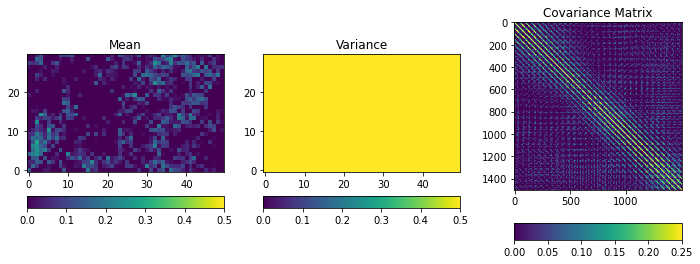

In [4]:
statistics = Statistics.Statistics(simulator, 100)
mean, var_mesh, cov = prior(grid=grid, phi=5.0)
statistics.set(mean, var_mesh*cov, nugget=0.5)
statistics.plot()

### Observations

In [5]:
observation = Observation.from_file(simulator)

Remember to set observation positions and to set values!


In [11]:
obs_poses = observation.positions * np.array([grid.dx, grid.dy])
obs_poses

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [3., 0.],
       [4., 0.],
       [0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [0., 2.],
       [1., 2.],
       [2., 2.],
       [3., 2.],
       [4., 2.]])

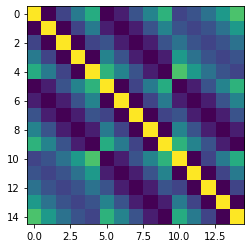

In [25]:
obs_dist_mat = np.eye(observation.N_y)
for i in range(observation.N_y):
    obs_dist_mat[i,:] = np.linalg.norm(obs_poses - obs_poses[i], axis=1)
np.fill_diagonal(obs_dist_mat, np.sqrt(grid.xdim**2 + grid.ydim**2))

from matplotlib import pyplot as plt
plt.imshow(obs_dist_mat)

In [45]:
groups = list([list(np.arange(observation.N_y, dtype=int))])
groups

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]

In [54]:
obs_dist_mat[np.ix_(groups[0],groups[0])].shape

(14, 14)

In [48]:
groups[0] = list(np.delete(groups[0], np.where(groups[0] == 5)))
groups

[[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]]

### Filtering

In [6]:
letkFilter = LETKalmanFilter.LETKalman(statistics, observation, 5)

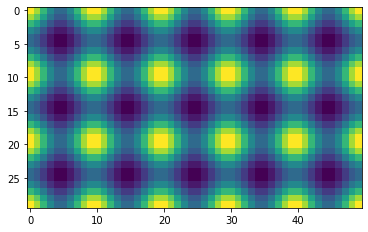

In [7]:
from matplotlib import pyplot as plt
plt.imshow(letkFilter.W_analysis)

0


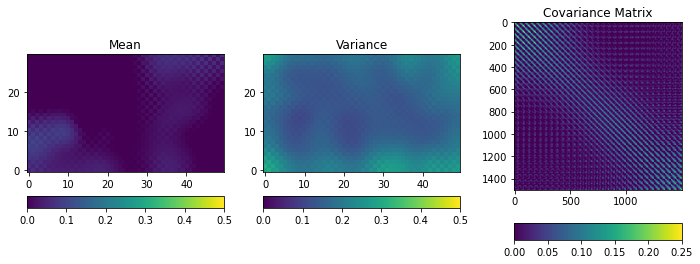

1


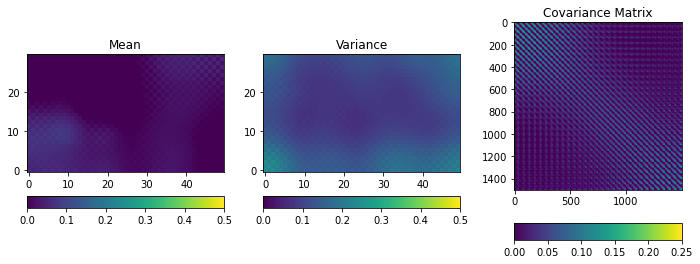

2


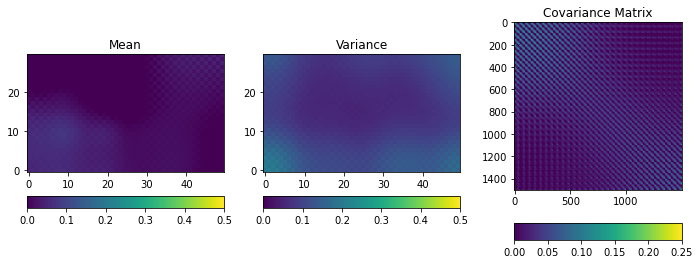

3


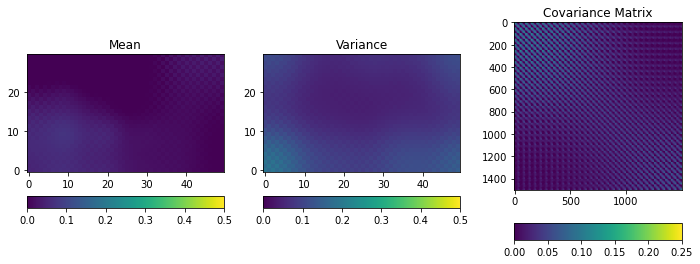

4


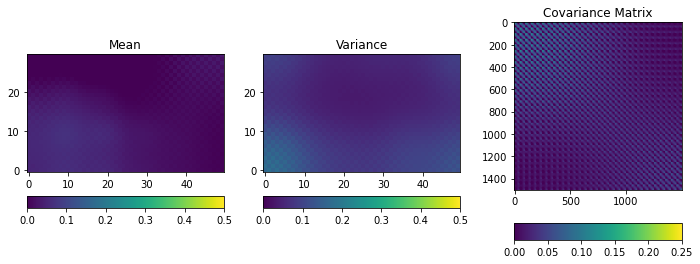

5


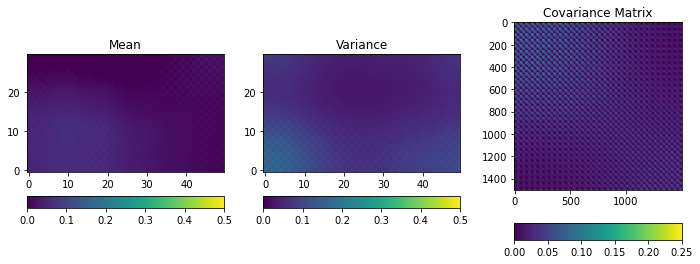

6


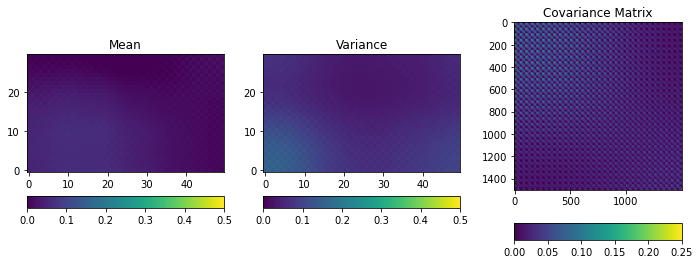

7


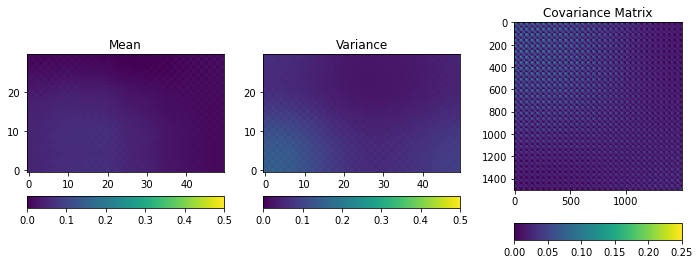

8


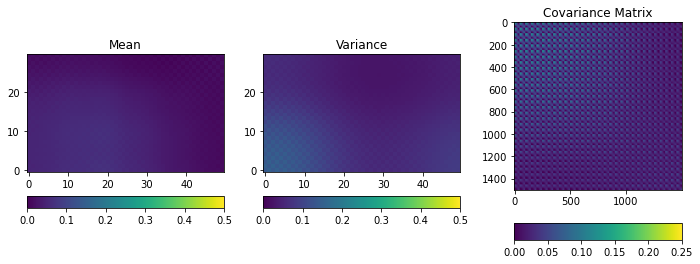

9


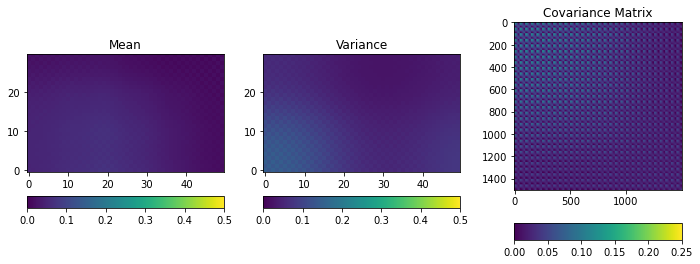

In [8]:
for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)
    letkFilter.filter(statistics.ensemble.ensemble, observation.obses[t])
    statistics.plot()